In [10]:
def count_map(field, criteria, dataset):
    serie = dataset[field].value_counts()
    count_map = {}
    for id in serie.index:
        if serie[id] > criteria:
            count_map[id] = serie[id]
    
    return count_map

In [13]:
def remove_empty_cves(dataset):
    return dataset.dropna(subset=['pub_date', 'mod_date'])

In [14]:
def remove_unmodified_cves(dataset):
    mask = (dataset['pub_date'] != dataset['mod_date'])
    return dataset.loc[mask]

In [16]:
def remove_duplicated_cves(dataset):
    agg_pattern = {'id' : 'first', 
                   'src_id' : 'first',
                   'pub_date' : 'first', 
                   'mod_date' : 'first', 
                   'part' : 'first', 
                   'vendor' : 'first', 
                   'product' : 'first', 
                   'version' : ' '.join, 
                   'cvss_score' : 'first', 
                   'severity' : 'first', 
                   'status' : 'first', 
                   'cwe_list' : 'first', 
                   'cpe_list' : 'first'}
    dataset.version = dataset.version.astype('string')
    result_dataset = dataset.groupby('id', as_index=False).agg(agg_pattern)
    return result_dataset

In [1]:
import os
import pandas as pd

In [2]:
dataset = pd.read_csv('ANDROID.csv')

In [3]:
dataset

,id,src_id,pub_date,mod_date,part,vendor,product,version,cvss_score,severity,status,cwe_list,cpe_list
0,CVE-2021-22492,cve@mitre.org,2021-01-05T18:15:18.740,2021-01-08T18:27:18.673,o,google,android,10.0,8.8,HIGH,Analyzed,CWE-120,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:*
1,CVE-2021-22494,cve@mitre.org,2021-01-05T18:15:18.850,2021-01-08T18:34:11.230,o,google,android,10.0,5.5,MEDIUM,Analyzed,NaN,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:* cp...
2,CVE-2021-22495,cve@mitre.org,2021-01-05T18:15:18.897,2021-01-08T18:45:52.543,o,google,android,10.0,5.5,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:* cpe...
3,CVE-2021-3022,cve@mitre.org,2021-01-05T18:15:19.020,2021-01-08T18:52:14.177,o,google,android,10.0,5.5,MEDIUM,Analyzed,NaN,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:*
4,CVE-2020-27059,security@android.com,2021-01-11T21:15:13.250,2021-07-21T11:39:23.747,o,google,android,10.0,7.8,HIGH,Analyzed,CWE-1021,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:*
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3762,CVE-2023-20915,security@android.com,2023-01-26T21:18:11.307,2023-02-01T19:00:49.127,o,google,android,13.0,7.8,HIGH,Analyzed,CWE-670,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:*
3763,CVE-2023-20919,security@android.com,2023-01-26T21:18:11.447,2023-02-01T18:55:32.637,o,google,android,13.0,7.8,HIGH,Analyzed,NaN,cpe:2.3:o:google:android:13.0:*:*:*:*:*:*:*
3764,CVE-2023-20920,security@android.com,2023-01-26T21:18:11.520,2023-02-01T18:54:59.567,o,google,android,13.0,7.8,HIGH,Analyzed,CWE-416,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:*
3765,CVE-2023-20921,security@android.com,2023-01-26T21:18:11.590,2023-02-01T18:54:45.607,o,google,android,13.0,7.3,HIGH,Analyzed,CWE-670,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:*


In [4]:
print("NÚMERO DE CVEs NO DATASET: {}".format(dataset['id'].count()))
print("--#CVEs versão 10.0 no dataset: {}".format(dataset.query("version == '10.0'")['id'].count()))
print("--#CVEs versão 11.0 no dataset: {}".format(dataset.query("version == '11.0'")['id'].count()))
print("--#CVEs versão 12.0 no dataset: {}".format(dataset.query("version == '12.0'")['id'].count()))
print("--#CVEs versão 12.1 no dataset: {}".format(dataset.query("version == '12.1'")['id'].count()))
print("--#CVEs versão 12L no dataset: {}".format(dataset.query("version == '12L'")['id'].count()))     
print("--#CVEs versão 13.0 no dataset: {}".format(dataset.query("version == '13.0'")['id'].count()))
print()

NÚMERO DE CVEs NO DATASET: 3767
--#CVEs versão 10.0 no dataset: 1006
--#CVEs versão 11.0 no dataset: 1260
--#CVEs versão 12.0 no dataset: 956
--#CVEs versão 12.1 no dataset: 221
--#CVEs versão 12L no dataset: 10
--#CVEs versão 13.0 no dataset: 314



In [5]:
print("DIVISÃO DA SEREVIDADE DAS CVEs DO DATASET:")
print("--#CVEs CRITICAL no dataset: {}".format(dataset.query("severity == 'CRITICAL'")['id'].count()))
print("--#CVEs HIGH no dataset: {}".format(dataset.query("severity == 'HIGH'")['id'].count()))
print("--#CVEs MEDIUM no dataset: {}".format(dataset.query("severity == 'MEDIUM'")['id'].count()))
print("--#CVEs LOW no dataset: {}".format(dataset.query("severity == 'LOW'")['id'].count()))
print()

DIVISÃO DA SEREVIDADE DAS CVEs DO DATASET:
--#CVEs CRITICAL no dataset: 145
--#CVEs HIGH no dataset: 1229
--#CVEs MEDIUM no dataset: 2058
--#CVEs LOW no dataset: 335



In [6]:
print("ESTATÍSTICA DO CVSS SCORES:")
print("--Minimo: {}".format(dataset['cvss_score'].min()))
print("--Maximo: {}".format(dataset['cvss_score'].max()))
print("--Média: {}".format(dataset['cvss_score'].mean()))
print("--Mediana: {}".format(dataset['cvss_score'].median()))
print("--Desvio Padrão: {}".format(dataset['cvss_score'].std()))
print()

ESTATÍSTICA DO CVSS SCORES:
--Minimo: 2.3
--Maximo: 10.0
--Média: 6.344279267321394
--Mediana: 6.7
--Desvio Padrão: 1.5728490119508376



In [11]:
result_map = count_map('src_id', 0, dataset)
print("FONTES DISTINTAS DE PUBLICAÇÃO: {}".format(len(result_map)))
for id in result_map.keys():
    print("--{} - {} publicações".format(id, result_map[id]))
    print()

FONTES DISTINTAS DE PUBLICAÇÃO: 9
--security@android.com - 1678 publicações

--mobile.security@samsung.com - 843 publicações

--security@mediatek.com - 658 publicações

--security@unisoc.com - 563 publicações

--cve@mitre.org - 13 publicações

--security-advisories@github.com - 6 publicações

--security@oppo.com - 3 publicações

--product.security@lge.com - 2 publicações

--security@vivo.com - 1 publicações



In [12]:
result_map = count_map('status', 0, dataset)
# https://nvd.nist.gov/vuln/vulnerability-status
print("STATUS DISTINTOS DE CVEs: {}".format(len(result_map)))
for id in result_map.keys():
    print("--{} - {} ocorrencias".format(id, result_map[id]))
    print()

STATUS DISTINTOS DE CVEs: 3
--Analyzed - 3747 ocorrencias

--Undergoing Analysis - 12 ocorrencias

--Modified - 8 ocorrencias



In [18]:
print("Total de CVEs no dataset orieginal: {}".format(dataset['id'].count()))
deduplicated_dataset = remove_duplicated_cves(dataset)
print("Total de CVEs no dataset não duplicado: {}".format(deduplicated_dataset['id'].count()))

Total de CVEs no dataset orieginal: 3767
Total de CVEs no dataset não duplicado: 1732


In [19]:
contagem_cwe = dataset['cwe_list'].value_counts()
print(contagem_cwe)

CWE-787            407
CWE-125            265
CWE-20             251
CWE-862            195
CWE-862 CWE-862    136
                  ... 
CWE-684              1
CWE-815              1
CWE-22 CWE-284       1
CWE-345              1
CWE-178              1
Name: cwe_list, Length: 181, dtype: int64


### Análise das Vulnerabilidades Críticas das Top 3 CWE's

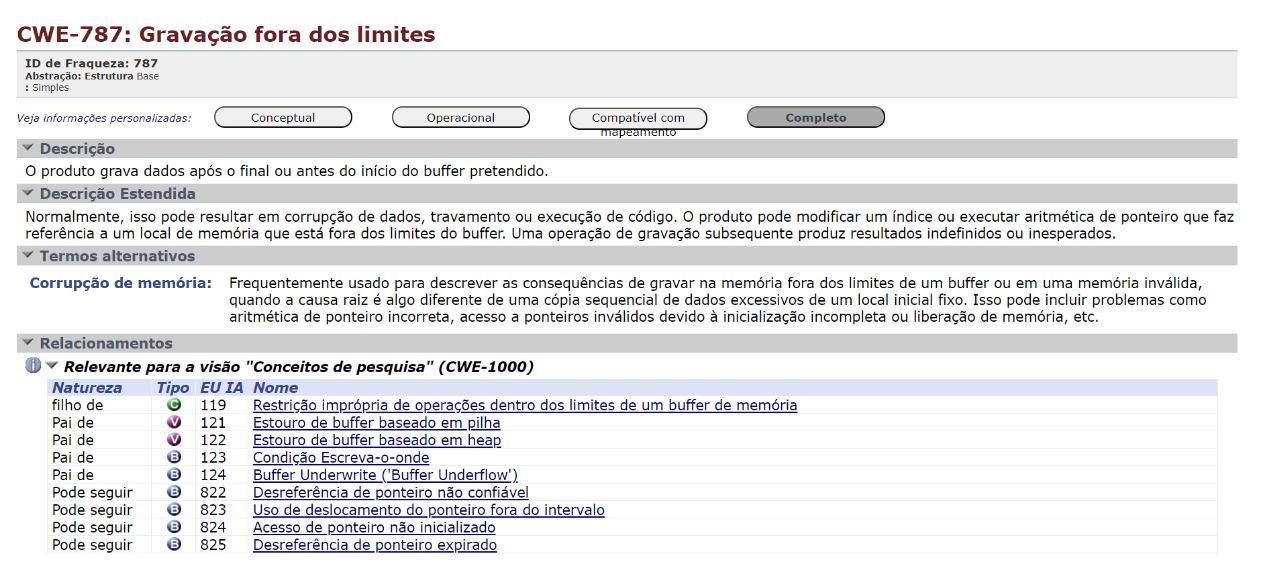

In [20]:
CWE_787 = dataset[dataset['cwe_list'] == 'CWE-787']
CWE_787

,id,src_id,pub_date,mod_date,part,vendor,product,version,cvss_score,severity,status,cwe_list,cpe_list
2,CVE-2021-22495,cve@mitre.org,2021-01-05T18:15:18.897,2021-01-08T18:45:52.543,o,google,android,10.0,5.5,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:* cpe...
9,CVE-2021-0308,security@android.com,2021-01-11T22:15:13.173,2022-02-09T17:02:53.453,o,google,android,10.0,6.8,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:*
11,CVE-2021-0311,security@android.com,2021-01-11T22:15:13.313,2021-01-13T15:43:01.037,o,google,android,10.0,6.5,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:*
15,CVE-2021-0316,security@android.com,2021-01-11T22:15:13.503,2021-01-13T16:44:57.723,o,google,android,10.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:*
22,CVE-2021-22495,cve@mitre.org,2021-01-05T18:15:18.897,2021-01-08T18:45:52.543,o,google,android,11.0,5.5,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:* cpe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,CVE-2022-44427,security@unisoc.com,2023-01-04T10:15:12.543,2023-01-11T02:40:25.590,o,google,android,12.0,5.5,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:* cp...
3689,CVE-2022-44428,security@unisoc.com,2023-01-04T10:15:12.593,2023-01-11T02:35:33.583,o,google,android,12.0,5.5,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:* cp...
3690,CVE-2022-44429,security@unisoc.com,2023-01-04T10:15:12.637,2023-01-11T02:30:48.053,o,google,android,12.0,5.5,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:* cp...
3691,CVE-2022-44430,security@unisoc.com,2023-01-04T10:15:12.680,2023-01-10T18:35:36.683,o,google,android,12.0,5.5,MEDIUM,Analyzed,CWE-787,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:* cp...


In [21]:
CWE_787_severity = CWE_787['severity'].value_counts()
print(CWE_787_severity)

MEDIUM      285
HIGH         95
CRITICAL     26
LOW           1
Name: severity, dtype: int64


In [22]:
CWE_787_Critical = CWE_787[CWE_787['severity'] == 'CRITICAL']
CWE_787_Critical

,id,src_id,pub_date,mod_date,part,vendor,product,version,cvss_score,severity,status,cwe_list,cpe_list
15,CVE-2021-0316,security@android.com,2021-01-11T22:15:13.503,2021-01-13T16:44:57.723,o,google,android,10.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:*
35,CVE-2021-0316,security@android.com,2021-01-11T22:15:13.503,2021-01-13T16:44:57.723,o,google,android,11.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:*
315,CVE-2021-0956,security@android.com,2021-12-15T19:15:11.747,2021-12-20T15:13:57.953,o,google,android,11.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:11.0:*:*:*:*:*:*:*
362,CVE-2021-0956,security@android.com,2021-12-15T19:15:11.747,2021-12-20T15:13:57.953,o,google,android,12.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:11.0:*:*:*:*:*:*:*
557,CVE-2021-25346,mobile.security@samsung.com,2021-03-04T22:15:14.220,2021-03-26T17:52:48.607,o,google,android,10.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:8.0:*:*:*:*:*:*:*
564,CVE-2021-0396,security@android.com,2021-03-10T16:15:16.327,2021-03-15T20:19:52.400,o,google,android,10.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:8.1:*:*:*:*:*:*:*
600,CVE-2021-0396,security@android.com,2021-03-10T16:15:16.327,2021-03-15T20:19:52.400,o,google,android,11.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:8.1:*:*:*:*:*:*:*
631,CVE-2021-0430,security@android.com,2021-04-13T19:15:12.787,2021-05-04T19:19:56.703,o,google,android,10.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:*
656,CVE-2021-0430,security@android.com,2021-04-13T19:15:12.787,2021-05-04T19:19:56.703,o,google,android,11.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:10.0:*:*:*:*:*:*:*
698,CVE-2021-0474,security@android.com,2021-06-11T17:15:09.673,2021-06-14T15:38:16.547,o,google,android,10.0,9.8,CRITICAL,Analyzed,CWE-787,cpe:2.3:o:google:android:8.1:*:*:*:*:*:*:*
